In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seaborn
from collections import Counter
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('C:/Users/User/Desktop/fea.csv')
df

,Device_ID,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index
0,207dd94c-0430-43aa-b388-4893447e628e,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,Medium,Poor,4,10.0,4.04
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,Medium,Good,7,10.0,4.23
2,b4adca05-564f-4b70-ab69-e8d66e656463,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,Medium,Good,6,10.0,2.21
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,Medium,Good,8,10.0,3.13
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,High,Good,5,10.0,4.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,39b2fb64-26ad-4c44-9373-758ef3761740,0,5000,4.9,7.3,32.2,55.6,7,1.7,13.4,Medium,Moderate,5,10.0,2.98
4996,708e9ce1-193f-415e-a1f1-8bbe6528cec1,28,4000,6.1,10.6,33.9,28.8,7,4.9,6.4,Low,Good,5,10.0,3.60
4997,6ce90202-2b2a-46e8-b313-936f2b5f32da,21,4500,7.5,12.1,35.8,50.7,3,3.0,16.6,Medium,Good,6,10.0,3.93
4998,a289b415-2c3e-4cea-b987-6224987f4b1b,15,4500,5.0,7.1,29.5,88.5,4,0.7,8.2,Medium,Good,7,10.0,2.28


In [2]:
df2 = pd.read_csv('C:/Users/User/Desktop/target.csv')
df2

,Device_ID,current_battery_health_percent,recommended_action
0,207dd94c-0430-43aa-b388-4893447e628e,32.8,Change Phone
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,50.3,Replace Battery
2,b4adca05-564f-4b70-ab69-e8d66e656463,66.1,Replace Battery
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,46.8,Change Phone
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,67.2,Replace Battery
...,...,...,...
4995,39b2fb64-26ad-4c44-9373-758ef3761740,89.1,Keep Using
4996,708e9ce1-193f-415e-a1f1-8bbe6528cec1,50.8,Replace Battery
4997,6ce90202-2b2a-46e8-b313-936f2b5f32da,51.2,Replace Battery
4998,a289b415-2c3e-4cea-b987-6224987f4b1b,78.1,Keep Using


In [3]:
df3 = pd.merge(df, df2, on = 'Device_ID') 
df3

,Device_ID,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index,current_battery_health_percent,recommended_action
0,207dd94c-0430-43aa-b388-4893447e628e,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,Medium,Poor,4,10.0,4.04,32.8,Change Phone
1,3f4d1d33-ba89-4814-a168-7b4cc75be26b,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,Medium,Good,7,10.0,4.23,50.3,Replace Battery
2,b4adca05-564f-4b70-ab69-e8d66e656463,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,Medium,Good,6,10.0,2.21,66.1,Replace Battery
3,4147e039-31b7-480a-bbc9-03cd0f66e9f1,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,Medium,Good,8,10.0,3.13,46.8,Change Phone
4,3f9b0fb7-73c2-4ab7-8e30-7b492097a3f5,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,High,Good,5,10.0,4.95,67.2,Replace Battery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,39b2fb64-26ad-4c44-9373-758ef3761740,0,5000,4.9,7.3,32.2,55.6,7,1.7,13.4,Medium,Moderate,5,10.0,2.98,89.1,Keep Using
4996,708e9ce1-193f-415e-a1f1-8bbe6528cec1,28,4000,6.1,10.6,33.9,28.8,7,4.9,6.4,Low,Good,5,10.0,3.60,50.8,Replace Battery
4997,6ce90202-2b2a-46e8-b313-936f2b5f32da,21,4500,7.5,12.1,35.8,50.7,3,3.0,16.6,Medium,Good,6,10.0,3.93,51.2,Replace Battery
4998,a289b415-2c3e-4cea-b987-6224987f4b1b,15,4500,5.0,7.1,29.5,88.5,4,0.7,8.2,Medium,Good,7,10.0,2.28,78.1,Keep Using


In [4]:
df3 = df3.drop(['Device_ID', 'current_battery_health_percent'], axis = 1)
df3['background_app_usage_level'] = df3['background_app_usage_level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df3['signal_strength_avg'] = df3['signal_strength_avg'].map({'Poor': 0, 'Moderate': 1, 'Good': 2})
df3['recommended_action'] = df3['recommended_action'].map({'Change Phone': 0, 'Replace Battery': 1, 'Keep Using': 2})
df3

,device_age_months,battery_capacity_mah,avg_screen_on_hours_per_day,avg_charging_cycles_per_week,avg_battery_temp_celsius,fast_charging_usage_percent,overnight_charging_freq_per_week,gaming_hours_per_week,video_streaming_hours_per_week,background_app_usage_level,signal_strength_avg,charging_habit_score,usage_intensity_score,thermal_stress_index,recommended_action
0,38,4500,7.1,11.4,34.8,90.8,7,7.9,14.0,1,0,4,10.0,4.04,0
1,28,3000,6.8,10.3,35.4,60.6,2,8.6,11.0,1,2,7,10.0,4.23,1
2,14,3000,7.2,11.2,29.4,29.3,4,0.3,10.3,1,2,6,10.0,2.21,1
3,42,3000,5.5,8.3,32.8,62.5,0,1.9,4.9,1,2,8,10.0,3.13,0
4,7,3000,7.6,11.6,38.7,85.4,6,7.9,9.3,2,2,5,10.0,4.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,5000,4.9,7.3,32.2,55.6,7,1.7,13.4,1,1,5,10.0,2.98,2
4996,28,4000,6.1,10.6,33.9,28.8,7,4.9,6.4,0,2,5,10.0,3.60,1
4997,21,4500,7.5,12.1,35.8,50.7,3,3.0,16.6,1,2,6,10.0,3.93,1
4998,15,4500,5.0,7.1,29.5,88.5,4,0.7,8.2,1,2,7,10.0,2.28,2


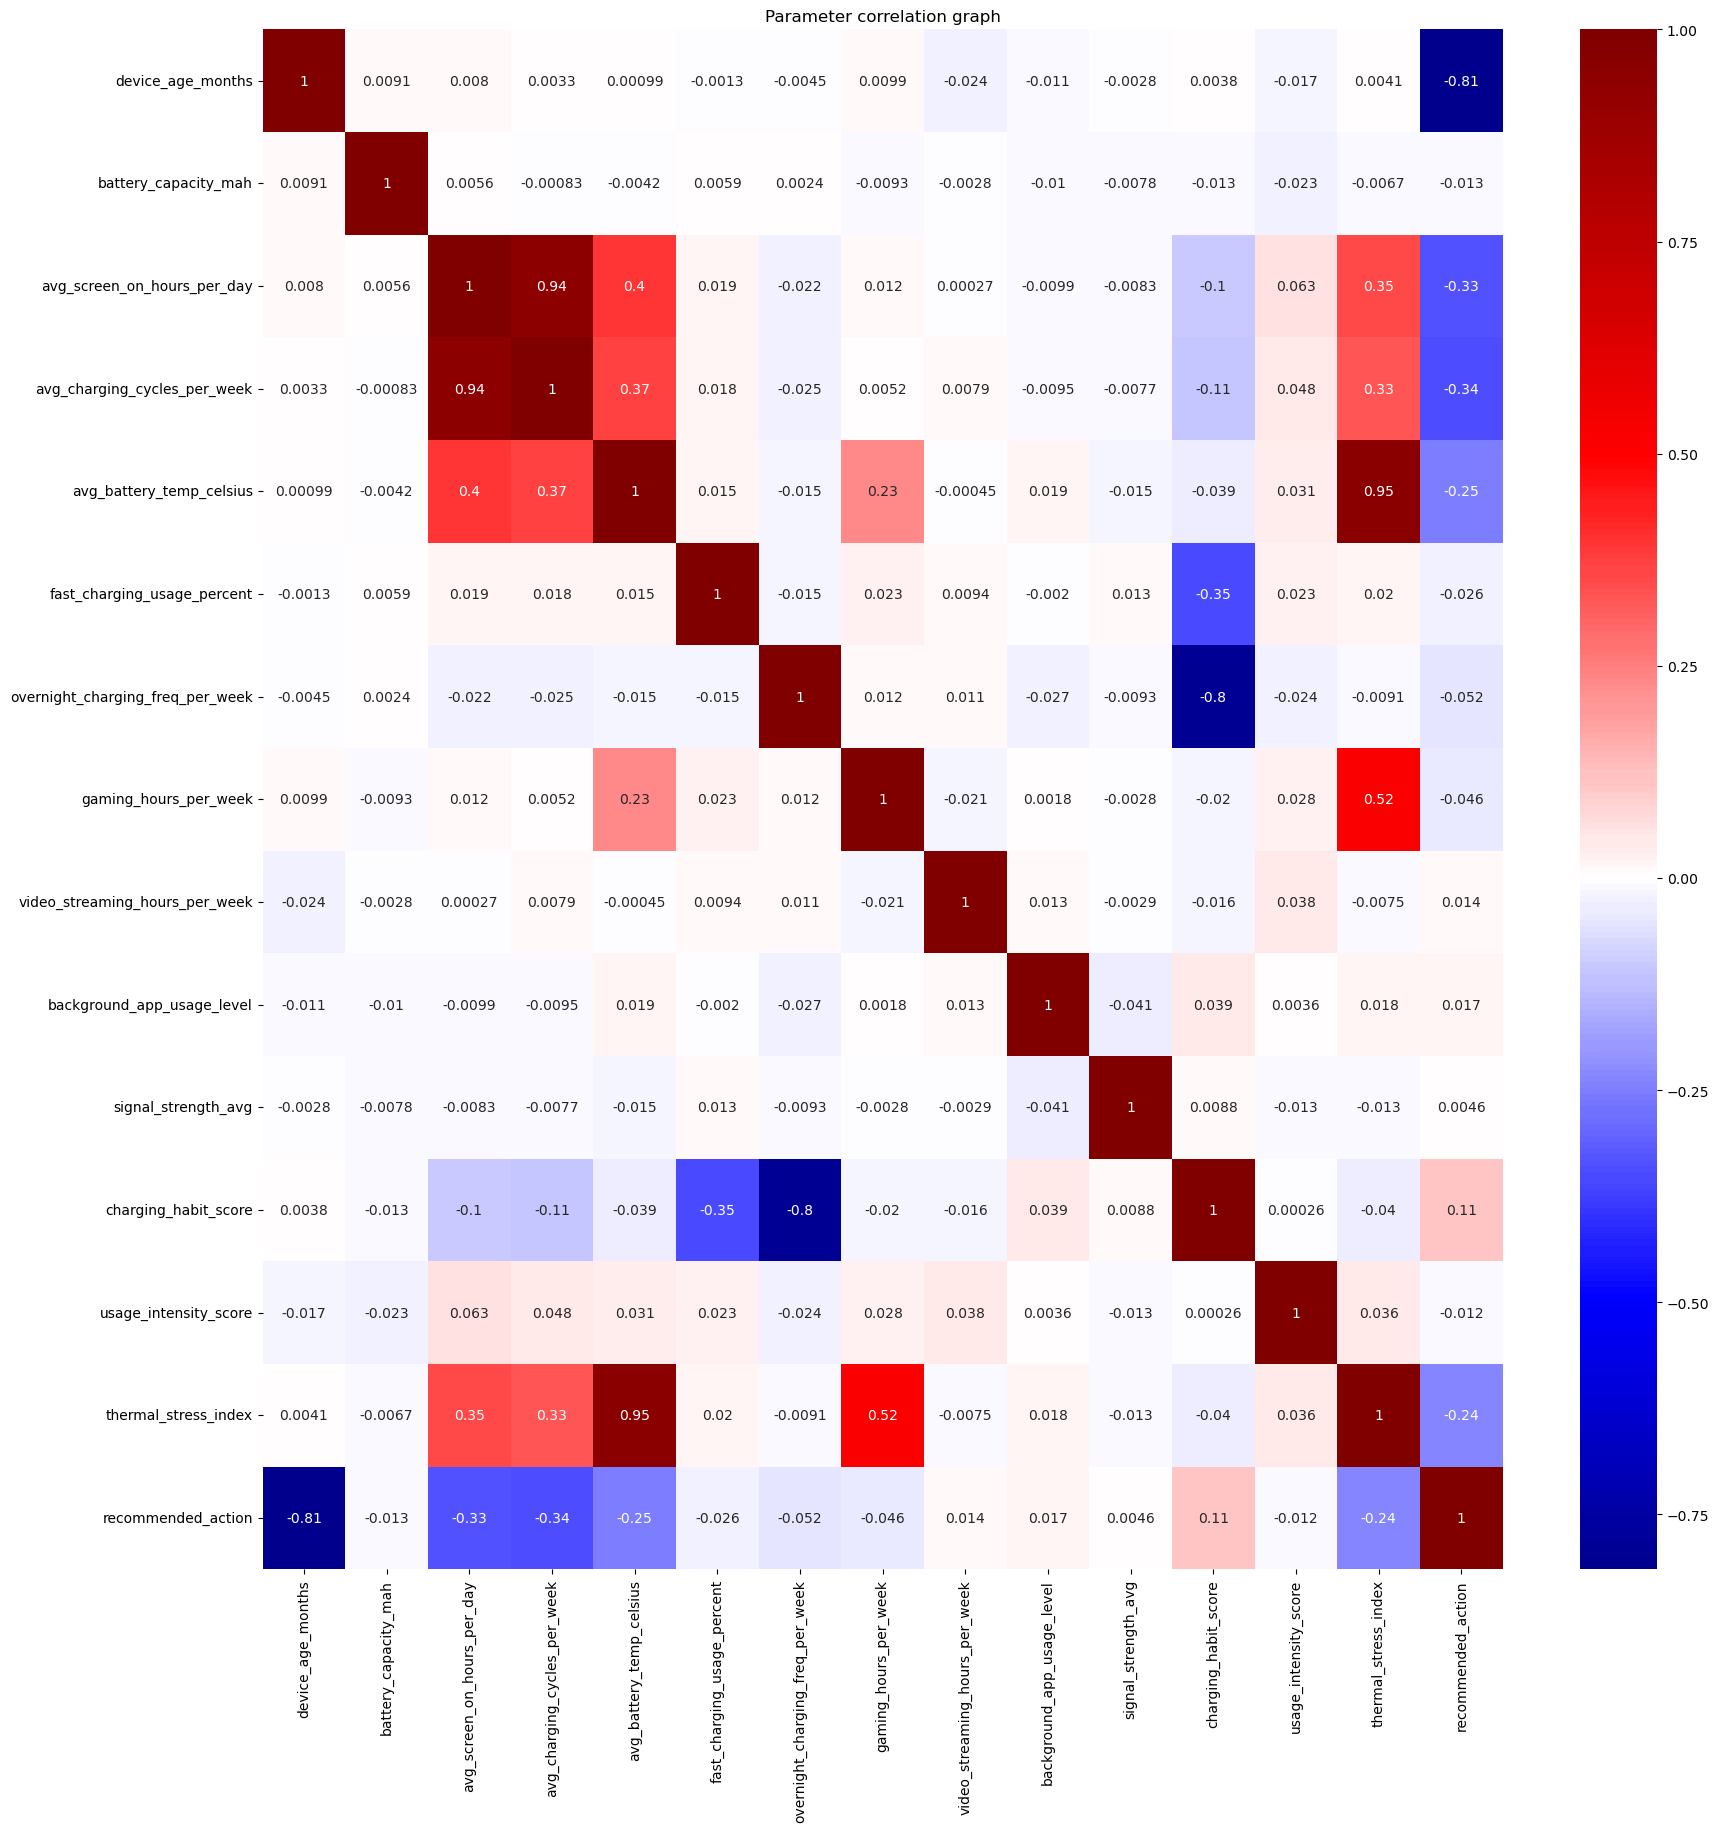

In [5]:
plt.figure(figsize=(20, 20))
seaborn.heatmap(df3.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

x = df3.drop(['recommended_action'], axis = 1).to_numpy()
y = df3['recommended_action'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42, stratify=y)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
# tensor_train = []
# tensor_test = []

# for i in range(len(x_train_scaled)):
#     temp_train = []
#     temp_train.append(x_train_scaled[i])
#     temp_train.append(y_train[i])
#     tensor_train.append(temp_train)

# for i in range(len(x_test_scaled)):
#     temp_test = []
#     temp_test.append(x_test_scaled[i])
#     temp_test.append(y_test[i])
#     tensor_test.append(temp_test)


In [7]:
def create_pairs(x_train_scaled, x_test_scaled, y_train, y_test):
    tensor_train = []
    tensor_test = []
    for i in range(len(x_train_scaled)):
        tensor_train.append([x_train_scaled[i], y_train[i]])
    for i in range(len(x_test_scaled)):
        tensor_test.append([x_test_scaled[i], y_test[i]])
    return tensor_train, tensor_test

In [8]:
!pip install torch -q
!pip install torchvision -q

In [12]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

tensor_train, tensor_test = create_pairs(x_train_scaled, x_test_scaled, y_train, y_test)
# Параметры DataLoader
batch_size = 32
train_loader = torch.utils.data.DataLoader(dataset=tensor_train,
                                            batch_size=batch_size,
                                            shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=tensor_test,
                                          batch_size=batch_size,
                                          shuffle=False)

# Определение модели
class NeuralNet(nn.Module):
    def __init__(self, input_size=14, hidden_size=8, num_classes=3):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.softmax1 = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.softmax2 = nn.Sigmoid()
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.softmax3 = nn.Softmax()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.softmax1(out)
        out = self.fc2(out)
        out = self.softmax2(out)
        out = self.fc3(out)
        out = self.softmax3(out)
        return out

model = NeuralNet().float()

# Параметры обучения
num_epochs = 500
learning_rate = 0.0005

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4) #L2 регуляризация

# Обучение модели
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (t_x, t_y) in enumerate(train_loader):  

        t_x = t_x.float()
        t_y = t_y.long()

        # Прямое распространение
        outputs = model(t_x)
        loss = criterion(outputs, t_y)
        
        # Обратное распространение и оптимизатор
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if epoch%50 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
        print(model.forward(t_x[0]))


D:\Aninst\Lib\site-packages\torch\nn\modules\module.py:1776: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/500], Loss: 1.0497
tensor([0.2142, 0.6051, 0.1807], grad_fn=<SoftmaxBackward0>)
Epoch [51/500], Loss: 0.6031
tensor([8.8836e-04, 1.1023e-02, 9.8809e-01], grad_fn=<SoftmaxBackward0>)
Epoch [101/500], Loss: 0.7599
tensor([2.8615e-01, 7.1330e-01, 5.5485e-04], grad_fn=<SoftmaxBackward0>)
Epoch [151/500], Loss: 0.6305
tensor([8.5234e-05, 9.9970e-01, 2.1291e-04], grad_fn=<SoftmaxBackward0>)
Epoch [201/500], Loss: 0.6008
tensor([9.9934e-01, 6.4551e-04, 1.3032e-05], grad_fn=<SoftmaxBackward0>)
Epoch [251/500], Loss: 0.6533
tensor([5.2305e-05, 9.9722e-01, 2.7299e-03], grad_fn=<SoftmaxBackward0>)
Epoch [301/500], Loss: 0.6090
tensor([4.1536e-04, 9.9916e-01, 4.2673e-04], grad_fn=<SoftmaxBackward0>)
Epoch [351/500], Loss: 0.7074
tensor([1.1141e-05, 9.9973e-01, 2.5725e-04], grad_fn=<SoftmaxBackward0>)
Epoch [401/500], Loss: 0.6542
tensor([8.8522e-02, 9.1117e-01, 3.0741e-04], grad_fn=<SoftmaxBackward0>)
Epoch [451/500], Loss: 0.5688
tensor([9.2103e-06, 9.9972e-01, 2.7457e-04], grad_fn=<Soft

In [13]:
model.forward(t_x)

D:\Aninst\Lib\site-packages\torch\nn\modules\module.py:1776: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[1.6612e-04, 1.7253e-03, 9.9811e-01],
        [1.4573e-05, 1.5431e-04, 9.9983e-01],
        [9.6771e-06, 9.9909e-01, 8.9784e-04],
        [1.2837e-01, 8.7007e-01, 1.5625e-03],
        [1.5278e-04, 9.9948e-01, 3.6399e-04],
        [2.4049e-05, 1.1822e-03, 9.9879e-01],
        [9.7546e-01, 2.4422e-02, 1.2035e-04],
        [2.0844e-03, 8.7621e-02, 9.1030e-01],
        [2.8505e-02, 9.7135e-01, 1.4653e-04],
        [5.1193e-02, 9.4787e-01, 9.3439e-04],
        [2.2266e-03, 9.9694e-01, 8.3599e-04],
        [1.2720e-05, 1.2603e-04, 9.9986e-01],
        [1.1972e-05, 1.6295e-04, 9.9983e-01],
        [6.7157e-05, 9.9983e-01, 9.7984e-05],
        [9.9257e-06, 9.9997e-01, 2.3250e-05],
        [9.3909e-06, 9.9992e-01, 6.5775e-05],
        [7.6452e-05, 8.2025e-03, 9.9172e-01],
        [1.1783e-05, 1.2079e-04, 9.9987e-01],
        [3.1478e-05, 4.3059e-04, 9.9954e-01],
        [9.6295e-04, 5.7500e-01, 4.2404e-01]], grad_fn=<SoftmaxBackward0>)

In [14]:
t_y

tensor([2, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2])